# Teste de viabilidade

Este notebook testa a viabilidade dos algoritmos do módulo `lexicogenero`, de minha autoria, para selecionar, dividir e organizar dados de textos em prosa em grego antigo para a disciplina FLL5133-2021.

## Carregamento e organização dos dados importados do Diorisis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lexicogenero.ferramentas.diorisis_reader import carrega_textos, em_pandas
from lexicogenero.main import DIORISIS_PATH

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

Neste teste, usaremos como corpus os textos de historiografia e prosa filosófica (diálogos e tratados) de autores do período clássico:

- Historiografia:
    - Heródoto
    - Xenofonte:
        - Ciropédia
        - Anábase
        - Helênica
    - Tucídides
- Prosa filosófica:
    - Platão
    - Xenofonte:
        - Agesilau
        - Hierão
        - Simpósio
        - Apologia
        - Memorabilia

In [2]:
ignorados = [
    "Xenophon (0032) - On the Art of Horsemanship (013).json",
    "Xenophon (0032) - Economics (003).json",
    "Xenophon (0032) - Ways and Means (011).json",
    "Xenophon (0032) - Constitution of the Lacedaemonians (010).json",
    "Xenophon (0032) - On the Cavalry Commander (012).json",
    "Xenophon (0032) - On Hunting (014).json",
    "Xenophon (0032) - Apology (005).json",
]

corpus = carrega_textos(autores=['Herodotus', 
                                 'Thucydides', 
                                 'Plato', 
                                 'Xenophon (0032)', # Exclui Xenofonte de Éfeso 
                                 ],
                        diorisis_path=DIORISIS_PATH,
                        ignore=ignorados,
                        verbose=False)

Carregando Herodotus (0016) - Histories (001).json
Carregando Thucydides (0003) - History (001).json
Carregando Plato (0059) - Cleitophon (029).json
Carregando Plato (0059) - Menexenus (028).json
Carregando Plato (0059) - Symposium (011).json
Carregando Plato (0059) - Hipparchus (015).json
Carregando Plato (0059) - Lovers (016).json
Carregando Plato (0059) - Minos (033).json
Carregando Plato (0059) - Phaedrus (012).json
Carregando Plato (0059) - Epinomis (035).json
Carregando Plato (0059) - Apology (002).json
Carregando Plato (0059) - Protagoras (022).json
Carregando Plato (0059) - Timaeus (031).json
Carregando Plato (0059) - Hippias Minor (026).json
Carregando Plato (0059) - Sophist (007).json
Carregando Plato (0059) - Gorgias (023).json
Carregando Plato (0059) - Laches (019).json
Carregando Plato (0059) - Critias (032).json
Carregando Plato (0059) - Euthyphro (001).json
Carregando Plato (0059) - Epistles (036).json
Carregando Plato (0059) - Hippias Major (025).json
Carregando Plato (

In [3]:
df = em_pandas(corpus)

Criando DF para: Herodotus (0016) - Histories (001).json
Criando DF para: Thucydides (0003) - History (001).json
Criando DF para: Plato (0059) - Cleitophon (029).json
Criando DF para: Plato (0059) - Menexenus (028).json
Criando DF para: Plato (0059) - Symposium (011).json
Criando DF para: Plato (0059) - Hipparchus (015).json
Criando DF para: Plato (0059) - Lovers (016).json
Criando DF para: Plato (0059) - Minos (033).json
Criando DF para: Plato (0059) - Phaedrus (012).json
Criando DF para: Plato (0059) - Epinomis (035).json
Criando DF para: Plato (0059) - Apology (002).json
Criando DF para: Plato (0059) - Protagoras (022).json
Criando DF para: Plato (0059) - Timaeus (031).json
Criando DF para: Plato (0059) - Hippias Minor (026).json
Criando DF para: Plato (0059) - Sophist (007).json
Criando DF para: Plato (0059) - Gorgias (023).json
Criando DF para: Plato (0059) - Laches (019).json
Criando DF para: Plato (0059) - Critias (032).json
Criando DF para: Plato (0059) - Euthyphro (001).json
C

In [4]:
df

,sent_id,location,form,lemma,POS,analyses,id,file,author,text
0,1,1.t.1,Ἡροδότου,Ἡρόδοτος,proper,masc gen sg,1,Herodotus (0016) - Histories (001).json,Herodotus,Histories
1,1,1.t.1,Ἁλικαρνησσέος,Ἁλικαρνησσεύς,proper,masc gen sg (epic ionic),2,Herodotus (0016) - Histories (001).json,Herodotus,Histories
2,1,1.t.1,ἱστορίης,ἱστορία,noun,fem gen sg (epic ionic),3,Herodotus (0016) - Histories (001).json,Herodotus,Histories
3,1,1.t.1,ἀπόδεξις,ἀπόδεξις,noun,fem nom sg,4,Herodotus (0016) - Histories (001).json,Herodotus,Histories
4,1,1.t.1,ἥδε,ὅδε,pronoun,fem nom sg,5,Herodotus (0016) - Histories (001).json,Herodotus,Histories
...,...,...,...,...,...,...,...,...,...,...
63970,3804,7.8.24.1,πρὸς,πρός,preposition,indeclform (prep),14,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis
63971,3804,7.8.24.1,Τισσαφέρνην,Τισσαφέρνης,proper,masc acc sg;masc acc sg (attic epic ionic),15,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis
63972,3804,7.8.24.1,καὶ,καί,conjunction,indeclform (conj),16,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis
63973,3804,7.8.24.1,Φαρνάβαζον,Φαρνάβαζος,proper,masc acc sg,17,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis


Liberando parte da memória RAM deletando valores que não serão mais utilizados:

In [5]:
del corpus

## Anotando Gênero

In [7]:
hist = [
    "Herodotus (0016) - Histories (001).json",
    "Thucydides (0003) - History (001).json",
    "Xenophon (0032) - Hellenica (001).json",
    "Xenophon (0032) - Cyropaedia (007).json",
    "Xenophon (0032) - Anabasis (006).json",
]

In [16]:
# Deve haver uma maneira menos rocambolesca para resolver isso
df['genero'] = np.nan
df.loc[df.file.isin(hist), 'genero'] = "hist"
df.genero.fillna("filo", inplace=True)

Para meu modelo funcionar, será necessário ter uma quantidade relativamente equilibrada de dados entre autores de prosa historiográfica e prosa filosófica, a seleção parece razoável.
Qualquer tentativa de aumentar os dados de historiografia forçaria aumentar o escopo temporal (o próximo autor seria Políbio, já do período helenístico)

<AxesSubplot:>

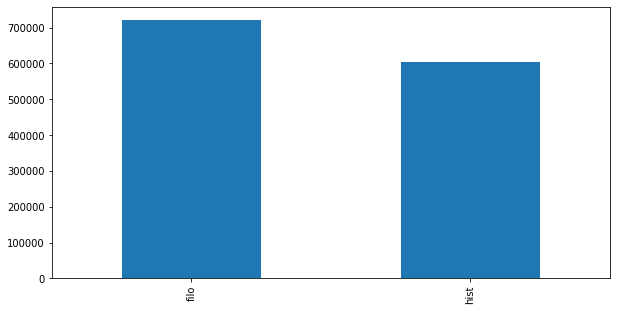

In [89]:
df.genero.value_counts().plot(kind='bar')

## Verbos por gênero

In [85]:
df_verbos = df[df.POS == "verb"]
df_verbos

,sent_id,location,form,lemma,POS,analyses,id,file,author,text,genero
9,1,1.t.1,γενόμενα,γίγνομαι,verb,aor part mid neut nom/voc/acc pl,9,Herodotus (0016) - Histories (001).json,Herodotus,Histories,hist
15,1,1.t.1,γένηται,γίγνομαι,verb,aor subj mid 3rd sg,15,Herodotus (0016) - Histories (001).json,Herodotus,Histories,hist
30,1,1.t.1,ἀποδεχθέντα,ἀποδέχομαι,verb,aor part pass neut nom/voc/acc pl;aor part pas...,28,Herodotus (0016) - Histories (001).json,Herodotus,Histories,hist
33,1,1.t.1,γένηται,γίγνομαι,verb,aor subj mid 3rd sg,30,Herodotus (0016) - Histories (001).json,Herodotus,Histories,hist
42,1,1.t.1,ἐπολέμησαν,πολεμέω,verb,aor ind act 3rd pl,38,Herodotus (0016) - Histories (001).json,Herodotus,Histories,hist
...,...,...,...,...,...,...,...,...,...,...,...
63955,3803,7.8.23.5,ποιεῖν,ποιέω,verb,pres inf act (attic epic doric),8,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis,hist
63960,3804,7.8.24.1,παραγενόμενος,παραγίγνομαι,verb,aor part mid masc nom sg,4,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis,hist
63961,3804,7.8.24.1,παρέλαβε,παραλαμβάνω,verb,aor ind act 3rd sg,5,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis,hist
63965,3804,7.8.24.1,συμμείξας,συμμίγνυμι,verb,aor part act masc nom/voc sg (attic epic ionic),9,Xenophon (0032) - Anabasis (006).json,Xenophon,Anabasis,hist


A filtragem não causa mudança na proporção entre documentos de historiografia e filosofia.

<AxesSubplot:>

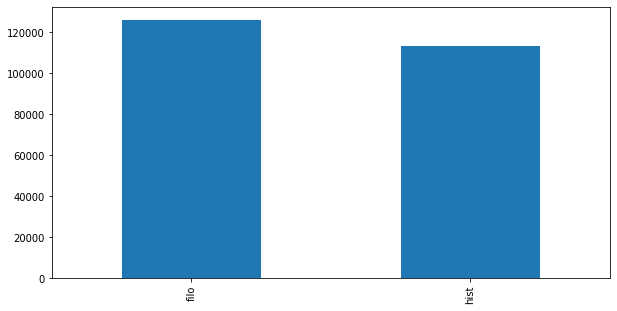

In [79]:
df_verbos.genero.value_counts().plot(kind='bar')

<AxesSubplot:>

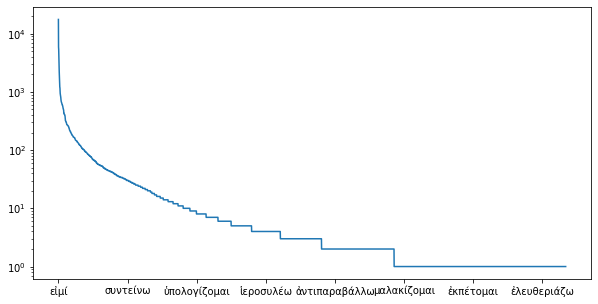

In [81]:
filo_verbos = df_verbos[df_verbos.genero == "filo"].lemma
filo_verbos.value_counts().plot(logy=True)

<AxesSubplot:>

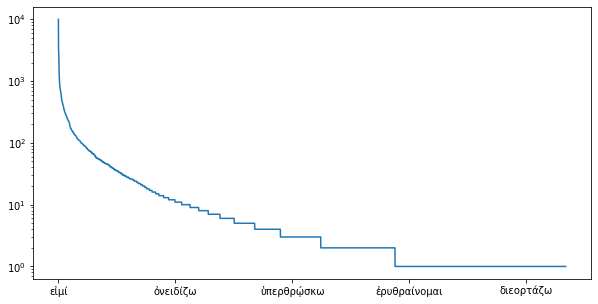

In [82]:
hist_verbos = df_verbos[df_verbos.genero == "hist"].lemma
hist_verbos.value_counts().plot(logy=True)